# Atividade 2: Perceptron Simples
## Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná
### Disciplina: Redes Neurais e Deep Learning
### Estudante: Admir Cesar de Oliveira Junior
### Data: 27/10/2025

### 1. Construindo o perceptron (dataset artificial, exemplo da aula)

In [179]:
# importações necessáras
## para o algoritmo
import pandas as pd
import numpy as np
## para os plots
import seaborn as sns
import matplotlib.pyplot as plt

Primeiro definimos uma função para treinar o perceptron e outra para realizar predições. A função de treino receberá o dataset de treino, pesos, taxa de aprendizado, número máximo de iterações e uma semente para o gerador aleatório:

In [180]:
def perceptron_train(train_set, weights = None, learning_rate = 0.3, n_iter = 1000,seed=13,verbose=True):
    np.random.seed(seed)
    # inicia variáveis de controle
    epochs = 0
    error = True

    if weights is None:
            weights = np.random.uniform(-1, 1, size=train_set.shape[1] - 1)

    #print(f"Pesos iniciais: {weights} \n")

    epoch_mean_error = []

    class_id = train_set.shape[1]-1
    
    while error and epochs < n_iter:
        error = False
        epochs = epochs + 1
        mean_error = []

        for i in range(0, train_set.shape[0]):
            # acessa exemplo atual
            example = train_set.iloc[i]

            
            # calcula a ativação do perceptron (spike)
            x = example.drop(example.index[class_id])
            v = np.dot(x, weights)

            # saída do neurônio
            y = 1 if v >= 0 else -1

            # adiciona à lista de erro
            error_val = example.iloc[class_id]-y
            mean_error.append(error_val**2)

            # se houve erro, atualiza pesos
            if example.iloc[class_id] != y:
                weights = weights + learning_rate*error_val*x.values
                error = True
            
            #print(f"Pesos atualizados: {weights}")
        mean_error = np.mean(mean_error)
        epoch_mean_error.append(mean_error)
        if verbose:
            print(f"Época: {epochs} - Erro médio: {mean_error}")
    
    obj = {
        "weights": weights,
        "epoch_mean_error": epoch_mean_error,
        "epochs": epochs
    }

    print(f"Finalizado depois de {epochs} épocas.\n")
    
    return obj

A função de predição receberá dados de teste e os pesos do modelo treinado:

In [181]:
def perceptron_predict(test_set, weights):
    v = np.dot(test_set, weights)

    y = 1 if v >= 0 else -1
    
    return y

Vamos treinar o modelo com o dataset artificial, seguindo o exemplo prático da aula:

In [182]:
artificial_df = pd.read_csv("datasets/artificial.csv")

model = perceptron_train(artificial_df, learning_rate=0.3)


Época: 1 - Erro médio: 2.6666666666666665
Época: 2 - Erro médio: 2.6666666666666665
Época: 3 - Erro médio: 3.0
Época: 4 - Erro médio: 3.0
Época: 5 - Erro médio: 2.6666666666666665
Época: 6 - Erro médio: 3.0
Época: 7 - Erro médio: 2.3333333333333335
Época: 8 - Erro médio: 1.6666666666666667
Época: 9 - Erro médio: 2.3333333333333335
Época: 10 - Erro médio: 1.6666666666666667
Época: 11 - Erro médio: 1.6666666666666667
Época: 12 - Erro médio: 2.0
Época: 13 - Erro médio: 2.3333333333333335
Época: 14 - Erro médio: 2.3333333333333335
Época: 15 - Erro médio: 1.6666666666666667
Época: 16 - Erro médio: 1.6666666666666667
Época: 17 - Erro médio: 1.6666666666666667
Época: 18 - Erro médio: 1.6666666666666667
Época: 19 - Erro médio: 2.3333333333333335
Época: 20 - Erro médio: 1.6666666666666667
Época: 21 - Erro médio: 1.6666666666666667
Época: 22 - Erro médio: 1.6666666666666667
Época: 23 - Erro médio: 1.6666666666666667
Época: 24 - Erro médio: 1.6666666666666667
Época: 25 - Erro médio: 1.66666666666

Podemos visualizar a saída da função:

In [183]:
model

{'weights': array([-21.64459518,   3.97508244,   2.44855707]),
 'epoch_mean_error': [np.float64(2.6666666666666665),
  np.float64(2.6666666666666665),
  np.float64(3.0),
  np.float64(3.0),
  np.float64(2.6666666666666665),
  np.float64(3.0),
  np.float64(2.3333333333333335),
  np.float64(1.6666666666666667),
  np.float64(2.3333333333333335),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(2.0),
  np.float64(2.3333333333333335),
  np.float64(2.3333333333333335),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(2.3333333333333335),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.6666666666666667),
  np.float64(1.3333333333333333),
  np.float64(1.0),
  np.float64(1.6666666666666667),
  np.f

Agora vamos definir algumas funções para plotar a curva de convergẽncia e o hiperplano classificador:

In [184]:
def plot_convergence(model):
    conv_df = pd.DataFrame({
        "error" : model["epoch_mean_error"],
        "epoch" : [x+1 for x in range(model["epochs"])]
    })

    sns.lineplot(data=conv_df, x="epoch",y="error")

def plot_hyperplan(training_data,x,y,response,model):
    data_sub = training_data.loc[:,[x,y,response]]

    w0 = model["weights"][0]
    w1 = model["weights"][1]
    w2 = model["weights"][2]

    slope = -(w0/w2)/(w0/w1)
    intercept = -w0/w2

    fig, ax = plt.subplots()
    sns.scatterplot(data=data_sub,x=x,y=y,hue=response,ax=ax)

    xmin, xmax = data_sub[x].min(), data_sub[x].max()

    ymin = intercept + slope * xmin
    ymax = intercept + slope * xmax

    ax.plot([xmin, xmax], [ymin, ymax])
    plt.show()

Visuzalizamos então o comportamento do erro de treino ao longo das épocas e o hiperplano final:

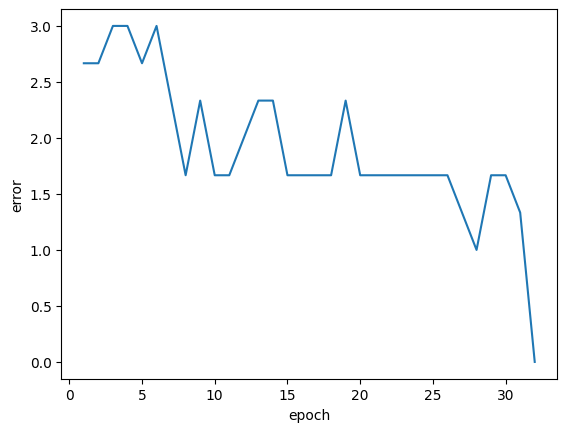

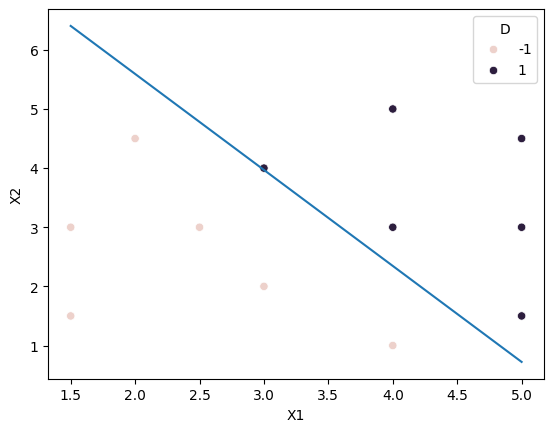

In [185]:
plot_convergence(model)
plot_hyperplan(artificial_df,"X1","X2","D",model)

Podemos experimentar com a semente e com a taxa de aprendizado, buscando entender como esses fatores alteram o aprendizado:

Finalizado depois de 37 épocas.



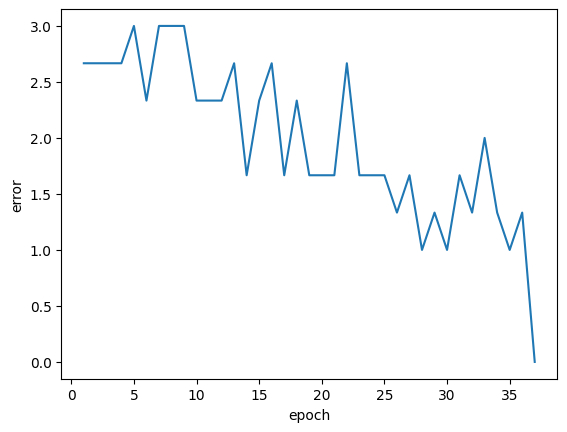

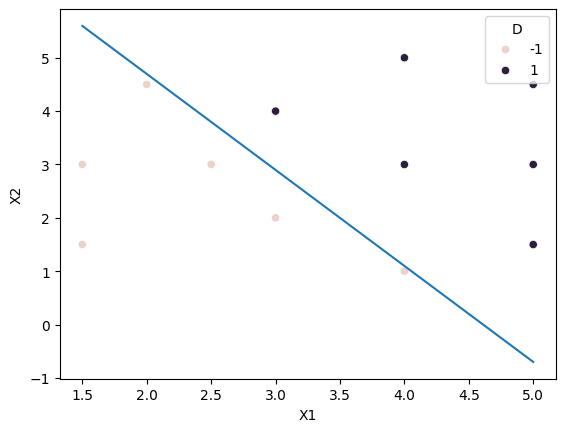

In [186]:
# taxa de aprendizado 10 vezes menor
model = perceptron_train(artificial_df, learning_rate=0.03,verbose=False)
plot_convergence(model)
plot_hyperplan(artificial_df,"X1","X2","D",model)

Finalizado depois de 76 épocas.



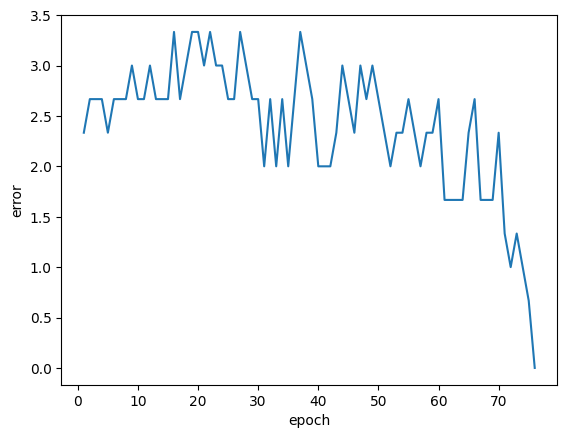

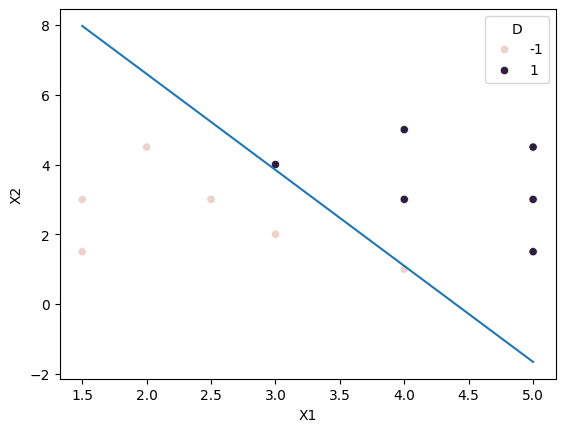

In [187]:
# taxa de aprendizado 100 vezes maior
model = perceptron_train(artificial_df, learning_rate=0.003,verbose=False)
plot_convergence(model)
plot_hyperplan(artificial_df,"X1","X2","D",model)

Finalizado depois de 20 épocas.



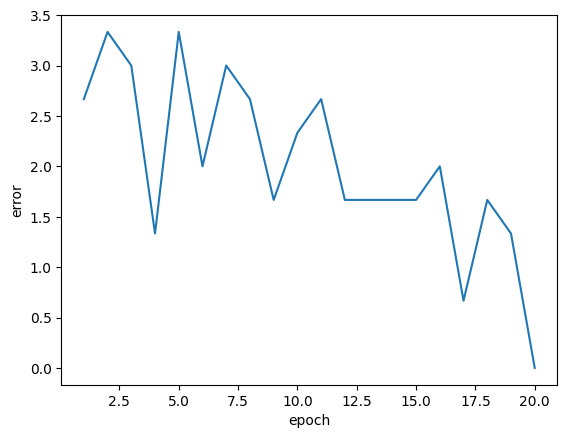

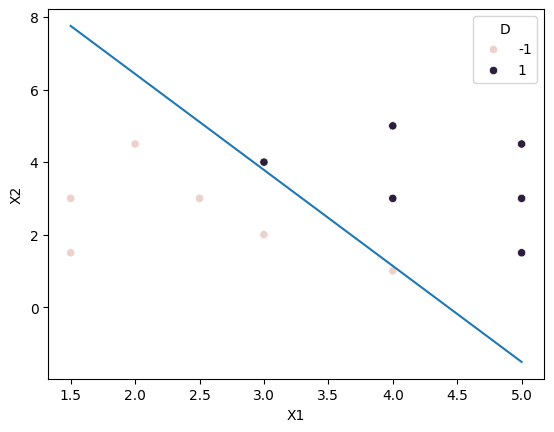

In [188]:
# uma semente diferente
model = perceptron_train(artificial_df, seed = 33, verbose=False)
plot_convergence(model)
plot_hyperplan(artificial_df,"X1","X2","D",model)

Assim observamos que uma taxa de aprendizado menor faz com que o treinamento seja mais longo. Além disso, a inicialização dos pesos possui influência sobre o treinamento.

Agora vamos realizar predições:

In [189]:
pred1 = perceptron_predict(
    [1,2,2],
    model["weights"]
)

pred2 = perceptron_predict(
    [1,4,4],
    model["weights"]
)

print(f"""
Predição 1:{pred1}
Predição 2: {pred2}
""")


Predição 1:-1
Predição 2: 1



### 2. Dataset AND

Carregando o dataset AND:

In [190]:
and_df = pd.read_csv("datasets/and.csv")
and_df

,Bias,X1,X2,D
0,1,0,0,-1
1,1,0,1,-1
2,1,1,0,-1
3,1,1,1,1


Treinando o modelo e visualizando o treinamento:

Finalizado depois de 51 épocas.



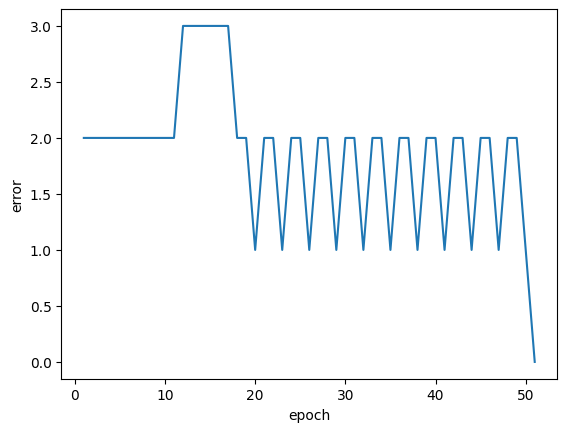

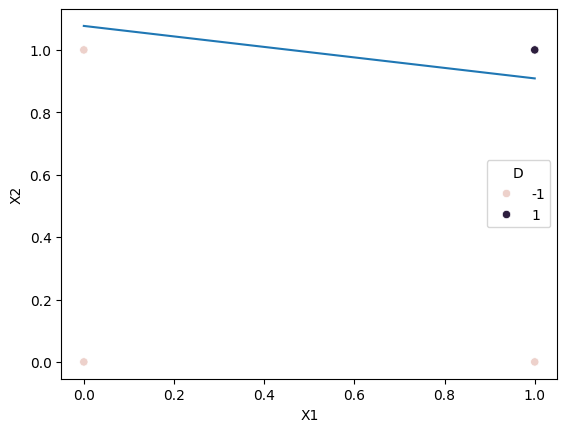

In [191]:
model = perceptron_train(and_df, learning_rate = 0.01, verbose = False)
plot_convergence(model)
plot_hyperplan(and_df,"X1","X2","D",model)

Experimentando com a taxa de aprendizado e com a semente:

Finalizado depois de 5 épocas.



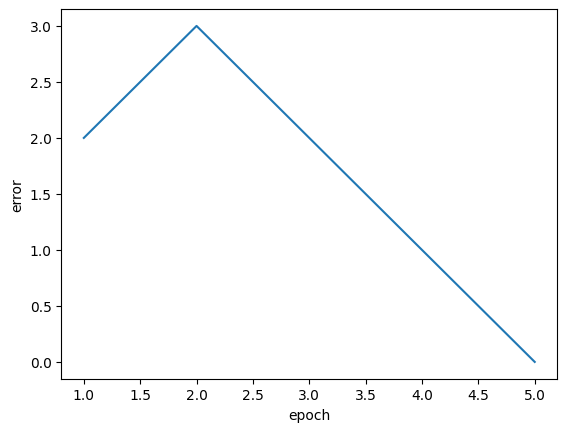

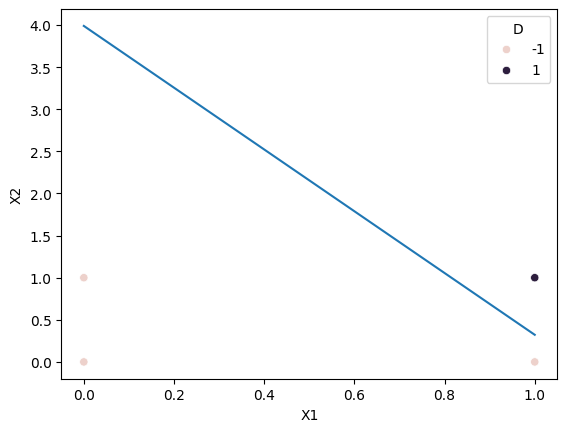

In [192]:
model = perceptron_train(and_df, learning_rate = 0.4, seed = 42, verbose = False)
plot_convergence(model)
plot_hyperplan(and_df,"X1","X2","D",model)

Finalizado depois de 5 épocas.



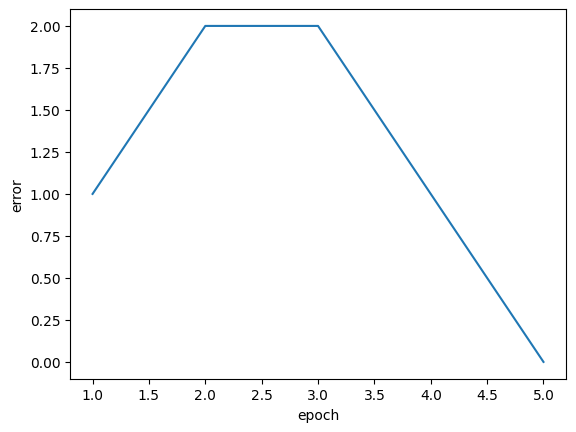

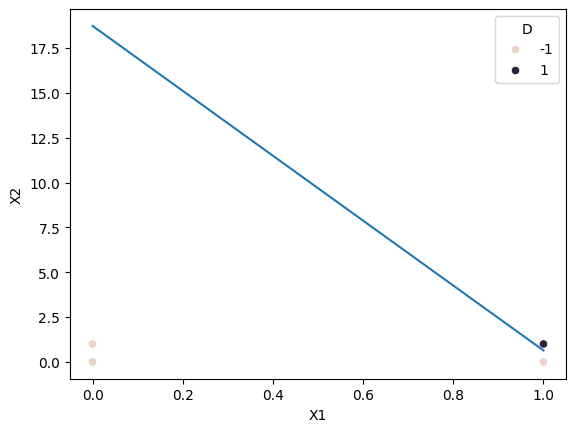

In [193]:
model = perceptron_train(and_df, learning_rate = 0.02, seed = 55, verbose = False)
plot_convergence(model)
plot_hyperplan(and_df,"X1","X2","D",model)

Testando com algumas predições:

In [194]:
pred1 = perceptron_predict(
    [1, 0, 1],
    model["weights"]
)

pred2 = perceptron_predict(
    [1, 1, 0],
    model["weights"]
)

pred3 = perceptron_predict(
    [1, 0, 0],
    model["weights"]
)

print(f"""
Predição 1: {pred1}
Predição 2: {pred2}
Predição 3: {pred3}
""")


Predição 1: -1
Predição 2: -1
Predição 3: -1



### 3. Dataset OR

In [195]:
or_df = pd.read_csv("datasets/or.csv")
or_df

,Bias,X1,X2,D
0,1,0,0,-1
1,1,0,1,1
2,1,1,0,1
3,1,1,1,1


Finalizado depois de 56 épocas.



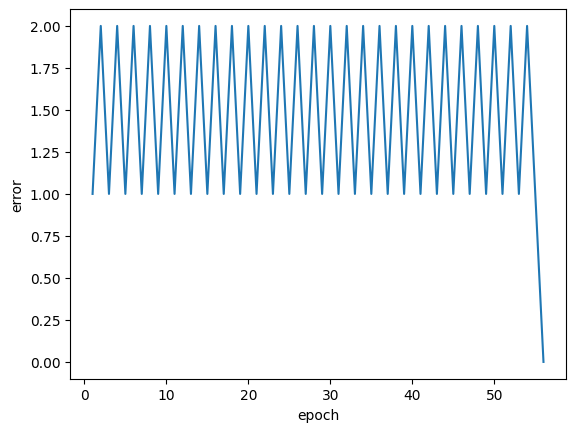

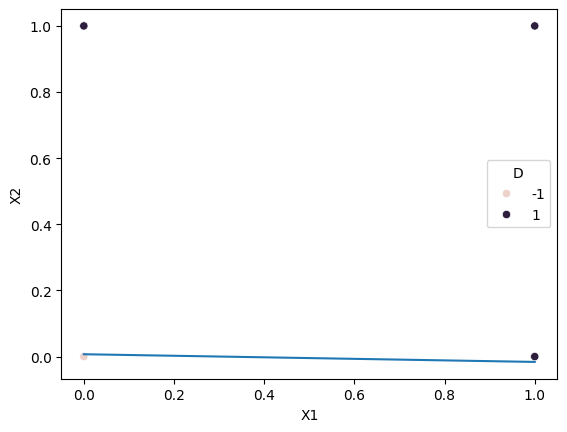

In [196]:
model = perceptron_train(or_df, learning_rate = 0.01, verbose = False)
plot_convergence(model)
plot_hyperplan(or_df,"X1","X2","D",model)

Experimentando com a taxa de aprendizado:

Finalizado depois de 5 épocas.



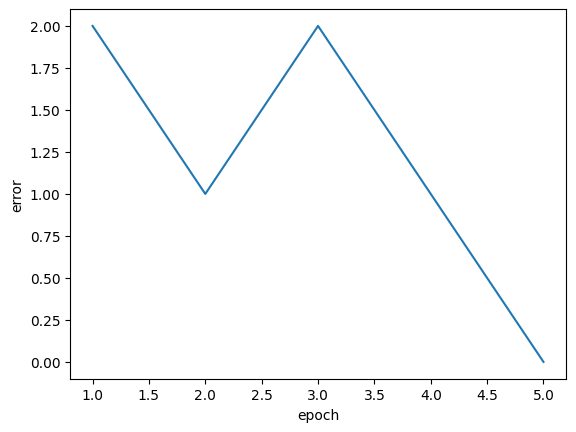

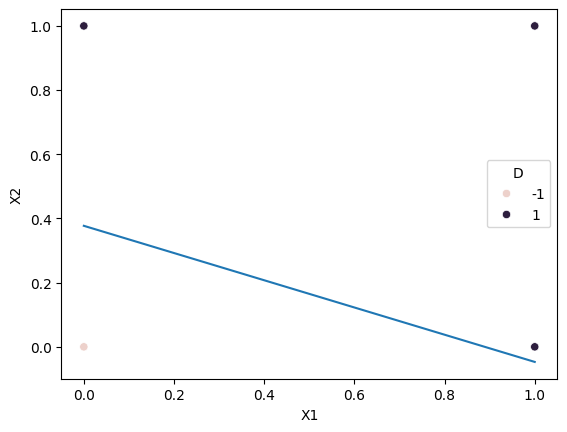

In [197]:
model = perceptron_train(or_df, learning_rate = 0.2, verbose = False)
plot_convergence(model)
plot_hyperplan(or_df,"X1","X2","D",model)

### 3. Dataset XOR

In [198]:
xor_df = pd.read_csv("datasets/xor.csv")
xor_df

,Bias,X1,X2,D
0,1,0,0,-1
1,1,0,1,1
2,1,1,0,1
3,1,1,1,-1


Finalizado depois de 1000 épocas.



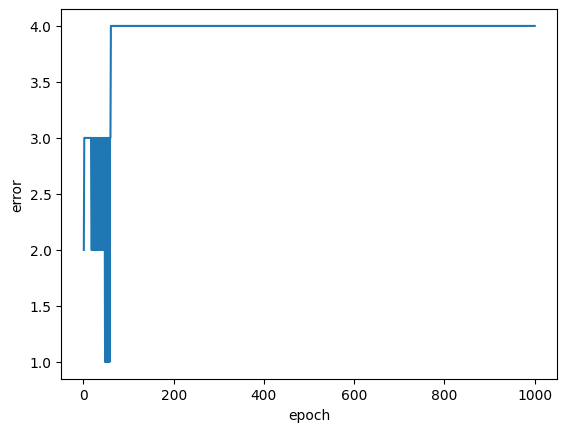

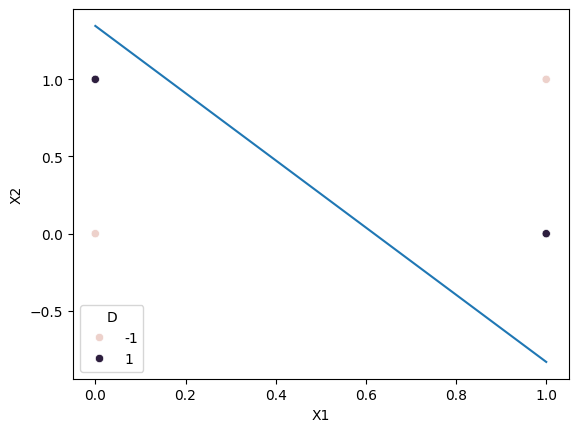

In [199]:
model = perceptron_train(xor_df, learning_rate = 0.01, verbose = False)
plot_convergence(model)
plot_hyperplan(xor_df,"X1","X2","D",model)

É possível observar que o treinamento falha com o dataset XOR. Isso se deve ao fato de que os dados não são separáveis linearmente. Assim, é impossível aprender a classificação destes dados com este perceptron.

### 4. Dataset Iris

Carregamos o dataset iris utilizando a biblioteca scikit-learn:

In [200]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df["target"] = iris.target
iris_df["species"] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Neste dataset, as espécies vêm codificadas. Vamos juntar as espécies "virginica" e "versicolor" em uma só classe.

In [201]:
iris_df[["target","species"]].drop_duplicates()

,target,species
0,0,setosa
50,1,versicolor
100,2,virginica


Adaptamos as classes para caber no formato determinado no código do perceptron:

In [202]:
iris_df["target"] = iris_df["target"].map({
    0: -1,
    1: 1,
    2: 1
})

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,-1,setosa
1,4.9,3.0,1.4,0.2,-1,setosa
2,4.7,3.2,1.3,0.2,-1,setosa
3,4.6,3.1,1.5,0.2,-1,setosa
4,5.0,3.6,1.4,0.2,-1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,virginica
146,6.3,2.5,5.0,1.9,1,virginica
147,6.5,3.0,5.2,2.0,1,virginica
148,6.2,3.4,5.4,2.3,1,virginica


Renomeamos as variáveis para facilitar a manipulação:

In [203]:
iris_df = iris_df.rename(columns={
    "petal length (cm)": "petal_length",
    "sepal width (cm)": "sepal_width"
})

iris_df

,sepal length (cm),sepal_width,petal_length,petal width (cm),target,species
0,5.1,3.5,1.4,0.2,-1,setosa
1,4.9,3.0,1.4,0.2,-1,setosa
2,4.7,3.2,1.3,0.2,-1,setosa
3,4.6,3.1,1.5,0.2,-1,setosa
4,5.0,3.6,1.4,0.2,-1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,virginica
146,6.3,2.5,5.0,1.9,1,virginica
147,6.5,3.0,5.2,2.0,1,virginica
148,6.2,3.4,5.4,2.3,1,virginica


Removemos as colunas que não são necessárias e adicionamos uma coluna "Bias", deixando o dataset no formato adequado:

In [204]:
iris_df = iris_df.drop(iris_df.columns[[0,3,5]],axis=1)
iris_df.insert(0, "Bias", 1)
iris_df

,Bias,sepal_width,petal_length,target
0,1,3.5,1.4,-1
1,1,3.0,1.4,-1
2,1,3.2,1.3,-1
3,1,3.1,1.5,-1
4,1,3.6,1.4,-1
...,...,...,...,...
145,1,3.0,5.2,1
146,1,2.5,5.0,1
147,1,3.0,5.2,1
148,1,3.4,5.4,1


Pela visualização das variáveis, podemos observar que as classes é linearmente separável, portanto o perceptron não deve ter dificuldades de aprender:

<Axes: xlabel='sepal_width', ylabel='petal_length'>

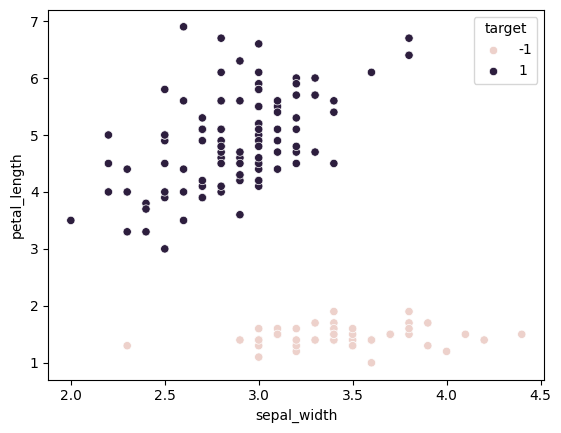

In [205]:
sns.scatterplot(data=iris_df,x="sepal_width",y="petal_length",hue="target")

Treinando o perceptron e visualizando seu aprendizado:

Finalizado depois de 9 épocas.



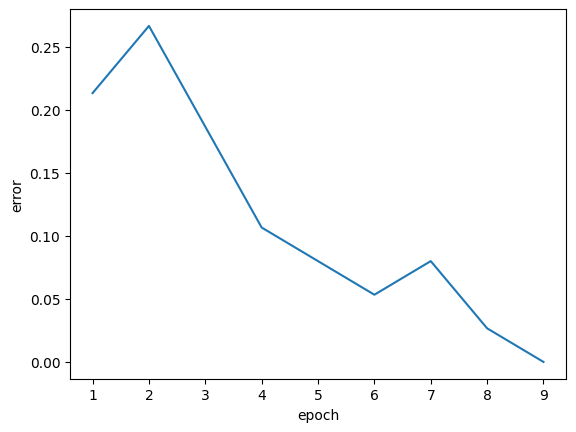

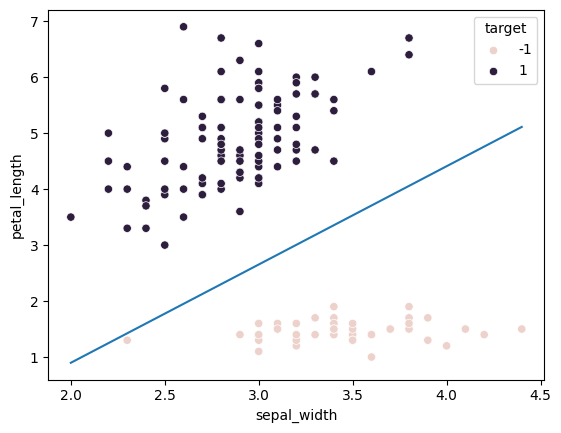

In [206]:
model = perceptron_train(iris_df,learning_rate=0.01, n_iter=1000, seed = 999, verbose=False)
plot_convergence(model)
plot_hyperplan(iris_df,"sepal_width","petal_length","target",model)

Realizando algumas predições:

In [208]:
# Claramente 1 (versicolor ou virginica)
pred1 = perceptron_predict(
    [1, 3, 4],
    model["weights"]
)

# Claramente -1 (setosa)
pred2 = perceptron_predict(
    [1, 3, 1],
    model["weights"]
)

# Muito próximo à fronteira de decisão
pred3 = perceptron_predict(
    [1, 2.6, 2],
    model["weights"]
)

print(f"""
Predição 1: {pred1}
Predição 2: {pred2}
Predição 3: {pred3}
""")


Predição 1: 1
Predição 2: -1
Predição 3: 1



Podemos experimentar com a semente e observaremos a predição próxima à fronteira de decisão se altera:

Finalizado depois de 4 épocas.



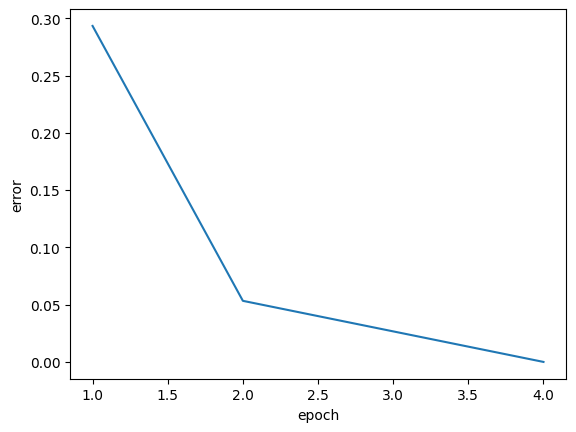

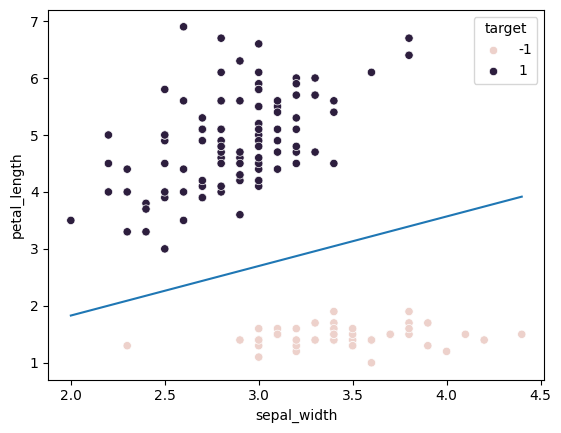

In [211]:
model = perceptron_train(iris_df,learning_rate=0.01, n_iter=1000, seed = 1010, verbose=False)
plot_convergence(model)
plot_hyperplan(iris_df,"sepal_width","petal_length","target",model)

In [212]:
# Claramente 1 (versicolor ou virginica)
pred1 = perceptron_predict(
    [1, 3, 4],
    model["weights"]
)

# Claramente -1 (setosa)
pred2 = perceptron_predict(
    [1, 3, 1],
    model["weights"]
)

# Muito próximo à fronteira de decisão
pred3 = perceptron_predict(
    [1, 2.6, 2],
    model["weights"]
)

print(f"""
Predição 1: {pred1}
Predição 2: {pred2}
Predição 3: {pred3}
""")


Predição 1: 1
Predição 2: -1
Predição 3: -1



### 5. Conclusão

Nesta atividade foi implementado um perceptron simples, em seu modo de treino e predição. Também foram implementados métodos para visualização do aprendizado do algoritmo. A experimentação com hiperparâmetros como taxa de aprendizado e com a semente do gerador dos pesos revelou que estes influenciam tanto no aprendizado quanto nas predições do perceptron.